## Условие 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.1 Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы

In [5]:
g = df.groupby('bedrooms').agg({'price': 'mean'}).reset_index()

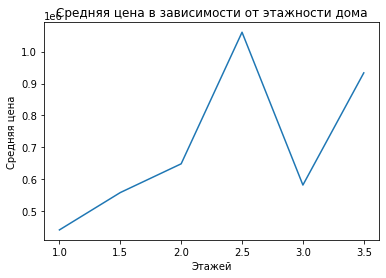

In [21]:
plt.figure(figsize=(6,4))
plt.plot(g['floors'], g['price'])
plt.title('Средняя цена в зависимости от этажности дома')
plt.xlabel('Этажей')
plt.ylabel('Средняя цена');

### Вывод. Видно что дома с 3 этажами в среднем дешевле чем дома с 2,5 этажами

### 1.2 Изучите стоимости недвижимости

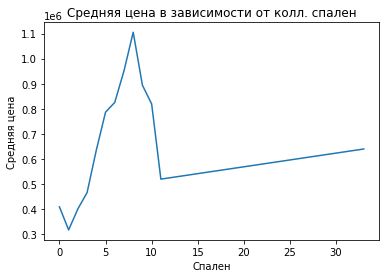

In [29]:
g1 = df.groupby('bedrooms').agg({'price': 'mean'}).reset_index()
plt.figure(figsize=(6,4))
plt.plot(g1['bedrooms'], g1['price'])
plt.title('Средняя цена в зависимости от колл. спален')
plt.xlabel('Спален')
plt.ylabel('Средняя цена');

### В среднем цена выше у довом у которых от 6 до 9 спален

### 1.3 Изучите распределение квадратуры жилой

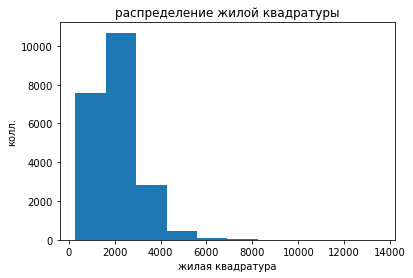

In [11]:

plt.figure(figsize=(6,4))
plt.hist(df['sqft_living'])
plt.title('распределение жилой квадратуры')
plt.xlabel('жилая квадратура')
plt.ylabel('колл.');

### Большая часть домов от 2000м2 дор 3000м2.

### 1.4 Изучите распределение года постройки

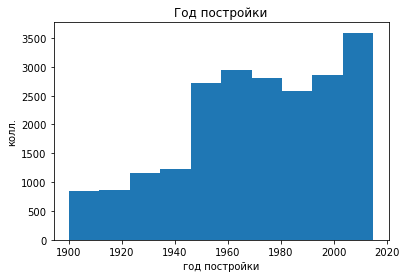

In [8]:

plt.figure(figsize=(6,4))
plt.hist(df['yr_built'])
plt.title('Год постройки')
plt.xlabel('год постройки')
plt.ylabel('колл.');

### Больше всего построек было с 2005 по 2015

## Условие 2

### 2.1 Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

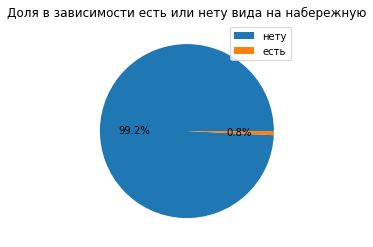

In [26]:
d = df['waterfront'].value_counts()
d.index = ['нету','есть']
plt.figure(figsize=(6,4))
plt.pie(d,autopct='%1.1f%%')
plt.title('Доля в зависимости есть или нету вида на набережную')
plt.legend(d.index);

### 2.2 Изучите распределение этажей домов

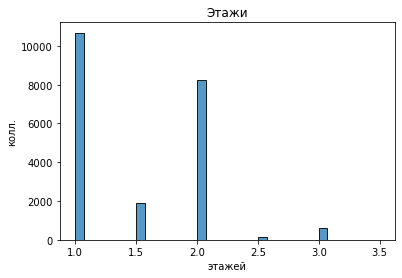

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['floors'])
plt.title('Этажи')
plt.xlabel('этажей')
plt.ylabel('колл.');

### Больше всего домов с 1 и 2 этажами

### 2.3 Изучите распределение состояния домов

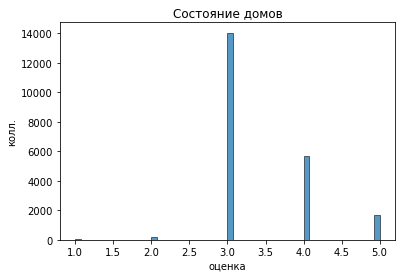

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['condition'])
plt.title('Состояние домов')
plt.xlabel('оценка')
plt.ylabel('колл.');

### Больше всего домов с оценкой состояния 3

## Условие 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

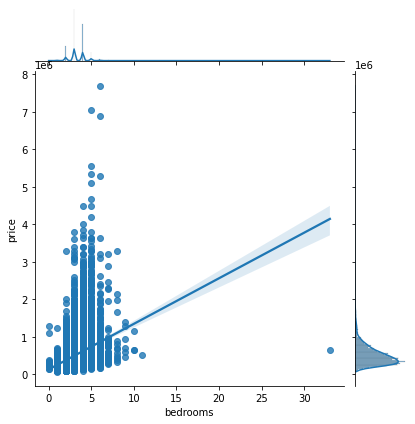

In [11]:
sns.jointplot(x = df['bedrooms'], y = df['price'], kind = 'reg');

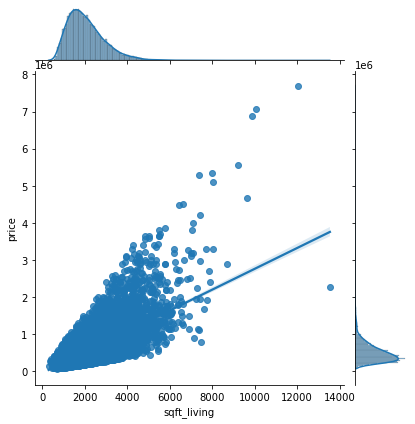

In [8]:
sns.jointplot(x = df['sqft_living'], y = df['price'], kind = 'reg');

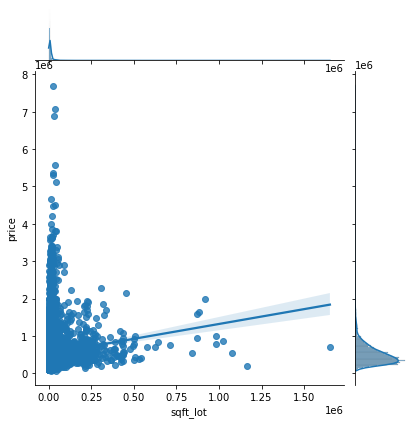

In [15]:
sns.jointplot(x = df['sqft_lot'], y = df['price'], kind = 'reg');

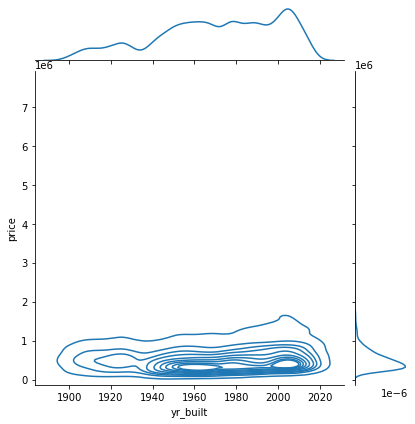

In [14]:
sns.jointplot(x = df['yr_built'], y = df['price'], kind = 'kde');


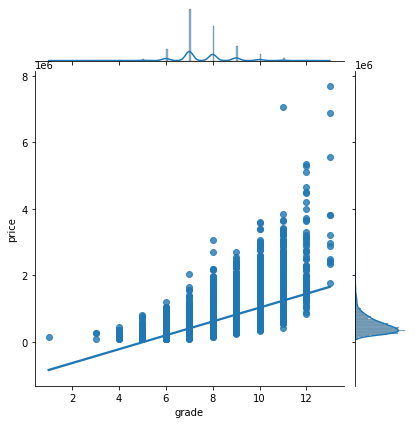

In [16]:
sns.jointplot(x = df['grade'], y = df['price'], kind = 'reg');

### видем что на цену больше всего вличет размер жилой площади

In [19]:
c = df.corr()
c = np.round(c,1)
c[np.abs(c)<0.3]=0
c

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

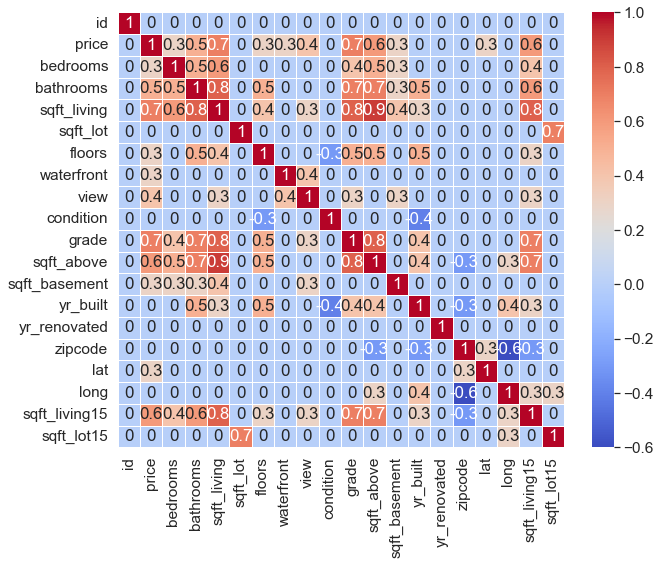

In [21]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.4)
sns.heatmap(c, annot=True, linewidths=.5, cmap ='coolwarm')

### видим что на стоимость влияет жилая площадь, оченка